<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Customising_TensorFlow2_models/Keras_functional_API/Keras_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
pip install --no-cache-dir -qU pip wheel
pip install --no-cache-dir -qU tensorflow-gpu pydot
pip install --no-cache-dir -qU pandas matplotlib seaborn scikit-learn
pip check

No broken requirements found.


In [1]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font="DejaVu Sans")

import tensorflow as tf
print(tf.__version__)

2.9.1


# The Keras functional API

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D
from tensorflow.keras.models import Model, Sequential

# model = Sequential([
#     Conv1D(16, 5, activation='relu', input_shape=(32, 1)),
#     AveragePooling1D(3),
#     Flatten(),
#     Dense(20, activation='sigmoid')
# ])

inputs = Input(shape=(32, 1))
h = Conv1D(16, 5, activation="relu")(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
outputs = Dense(20, activation="sigmoid")(h)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)
history = model.fit(
    X_train, y_train,
    validation_data=[X_Val, y_val],
    epochs=20
)
test_loss, test_acc = model.evaluate(X_test, y_test)
preds = model.predict(X_sample)

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D, \
    Concatenate

inputs = Input(shape=(32, 1))
h = Conv1D(16, 5, activation="relu")(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
aux_inputs = Input(shape=(12,))
h = Concatenate()([h, aux_inputs])
outputs = Dense(20, activation="sigmoid")(h)
aux_outputs = Dense(1, activation="linear")(h)

model = Model(
    inputs=[inputs, aux_inputs],
    outputs=[outputs, aux_outputs]
)
model.compile(
    loss=["binary_crossentropy", "mse"],
    loss_weights=[1, 0.4],
    metrics=["accuracy"]
)
history = model.fit(
    [X_train, X_aux],
    [y_train, y_aux],
    validation_split=0.2,
    epochs=20
)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D, \
    Concatenate

inputs = Input(shape=(32, 1), name="inputs")
h = Conv1D(16, 5, activation="relu")(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
aux_inputs = Input(shape=(12,), name="aux_inputs")
h = Concatenate()([h, aux_inputs])
outputs = Dense(20, activation="sigmoid", name="outputs")(h)
aux_outputs = Dense(1, activation="linear", name="aux_outputs")(h)

model = Model(
    inputs=[inputs, aux_inputs],
    outputs=[outputs, aux_outputs]
)
model.compile(
    loss={"outputs": "binary_crossentropy", "aux_outputs": "mse"},
    loss_weights={"outputs": 1, "aux_outputs": 0.4},
    metrics=["accuracy"]
)
history = model.fit(
    {"inputs": X_train, "aux_inputs": X_aux},
    {"outputs": y_train, "aux_outputs": y_aux},
    validation_split=0.2, epochs=20
)

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [3]:
os.makedirs("./data", exist_ok=True)

In [4]:
# Load the dataset

pd_dat = pd.read_csv("./data/diagnosis.csv")
dataset = pd_dat.values

dataset[:5, :]

array([[35.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [35.9,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [35.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [5]:
# Build train and test data splits

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    dataset[:, :6], dataset[:, 6:], test_size=0.33)
print(f"X_train shape: {X_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (80, 6)
Y_test shape: (40, 2)


In [6]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

print(f"temp_train shape: {temp_train.shape}")
print(f"nephr_test shape: {nephr_test.shape}")

temp_train shape: (80,)
nephr_test shape: (40,)


#### Build the model

In [7]:
# Build the input layers

from tensorflow.keras import Input

shape_inputs = (1, )
temperature = Input(shape=shape_inputs, name="temp")
nausea_occurence = Input(shape=shape_inputs, name="nocc")
lumbar_pain = Input(shape=shape_inputs, name="lumbp")
urine_pushing = Input(shape=shape_inputs, name="up")
micturition_pains = Input(shape=shape_inputs, name="mict")
bis = Input(shape=shape_inputs, name="bis")

In [8]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, 
    urine_pushing, micturition_pains, bis]

In [9]:
# Merge all input features into a single large vector

from tensorflow.keras import layers

x = layers.concatenate(list_inputs)

In [11]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(1, activation="sigmoid", name="inflam")(x)
nephritis_pred = layers.Dense(1, activation="sigmoid", name="nephr")(x)

In [12]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [13]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

In [14]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, "multi_input_output_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### Compile the model

In [15]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={"inflam": "binary_crossentropy", 
        "nephr": "binary_crossentropy"},
    metrics={"inflam": ["acc"], "nephr": ["acc"]},
    loss_weights=[1., 0.2])

#### Fit the model 

In [16]:
# Define training inputs and outputs

# inputs_train = [temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]
# outputs_train = [inflam_train, nephr_train]

inputs_train = {
    "temp": temp_train, "nocc": nocc_train, 
    "lumbp": lumbp_train, "up": up_train, 
    "mict": mict_train, "bis": bis_train
}

outputs_train = {"inflam": inflam_train, "nephr": nephr_train}

In [17]:
# Train the model

history = model.fit(inputs_train, outputs_train, epochs=1000,
    batch_size=128, verbose=False)

#### Plot the learning curves

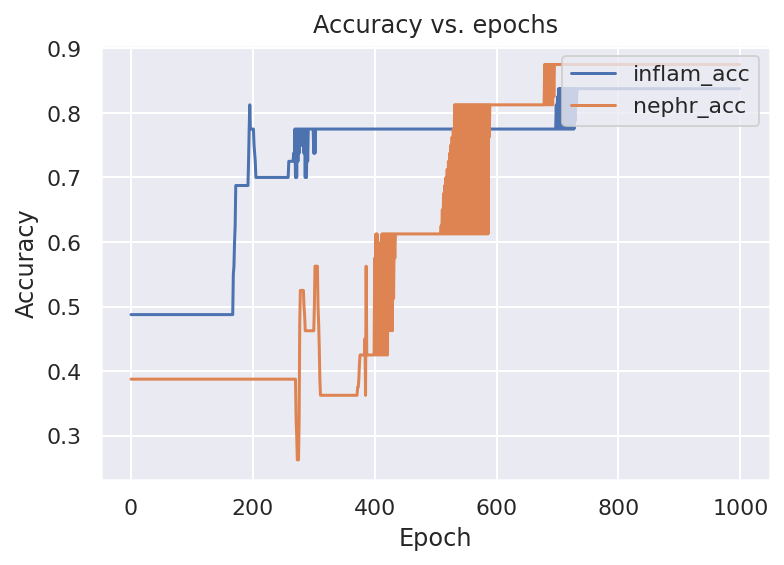

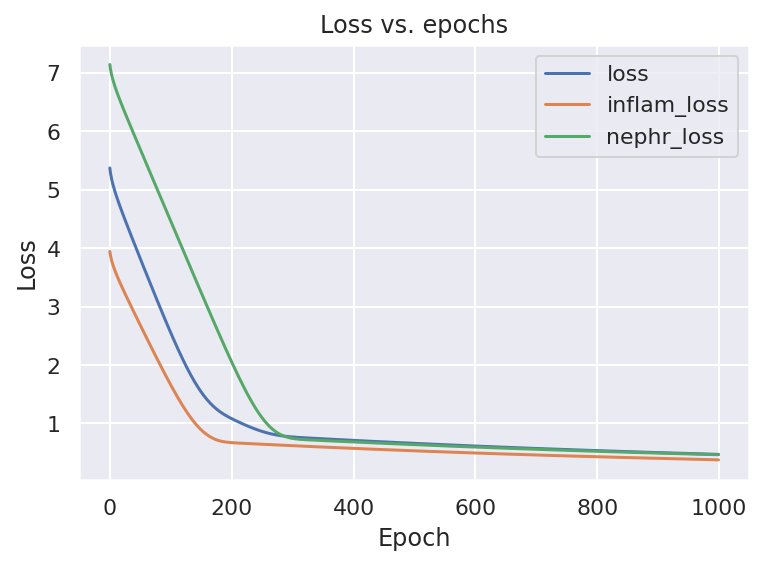

In [18]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ("inflam_acc", "nephr_acc")] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title("Accuracy vs. epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(acc_keys, loc="upper right")

plt.figure(2)
plt.title("Loss vs. epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loss_keys, loc="upper right")

plt.show()

In [19]:
# Evaluate the model

# Define testing inputs and outputs

inputs_test = {"temp": temp_test, "nocc": nocc_test, 
               "lumbp": lumbp_test, "up": up_test, 
               "mict": mict_test, "bis": bis_test}

outputs_test = {"inflam": inflam_test, "nephr": nephr_test}

loss, inflam_loss, nephr_loss, inflam_acc, nephr_acc = \
    model.evaluate(inputs_test, outputs_test, verbose=2)

2/2 - 0s - loss: 0.5369 - inflam_loss: 0.4385 - nephr_loss: 0.4920 - inflam_acc: 0.8250 - nephr_acc: 0.7500 - 185ms/epoch - 93ms/step


In [20]:
# Model's prediction

# Define inputs sample

X_sample = np.array([[38.8, 1., 0., 1., 0., 1.]])
X_sample = np.transpose(X_sample)
inputs_sample = {"temp": X_sample[0], "nocc": X_sample[1], 
               "lumbp": X_sample[2], "up": X_sample[3], 
               "mict": X_sample[4], "bis": X_sample[5]}

inflam_pred, nephr_pred = model.predict(inputs_sample)
print(inflam_pred, nephr_pred)

1/1 [==============================] - 0s 79ms/step
[[0.8657002]] [[0.5143705]]


***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(1, input_shape=(4, ))
])

print(model.weights)

[<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 0.08758533],
       [ 0.17139888],
       [ 0.4191184 ],
       [-0.58270717]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [7]:
import tensorflow as tf

my_var = tf.Variable([-1, 2], dtype=tf.float32, name='my_var')
print(my_var)

my_var.assign([3.5, -1.])
x = my_var.numpy()
print(x)

<tf.Variable 'my_var:0' shape=(2,) dtype=float32, numpy=array([-1.,  2.], dtype=float32)>
[ 3.5 -1. ]


In [8]:
import tensorflow as tf

my_var = tf.Variable([-1, 2], dtype=tf.float32, name='my_var')
h = my_var + [5, 4]
print(h)

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

inputs = Input(shape=(5, ))
h = Dense(16, activation='sigmoid')(inputs)
outputs = Dense(10, activation='softmax')(h)

print(h)
print(outputs)

model = Model(inputs=inputs, outputs=outputs)

print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_6/Softmax:0', description="created by layer 'dense_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_6/Softmax:0', description="created by layer 'dense_6'")


In [13]:
import tensorflow as tf

x = tf.constant([[5, 2], [1, 3]])
print(x)

x_arr = x.numpy()
print(x_arr)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)
[[5 2]
 [1 3]]


In [14]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

y = tf.zeros(shape=(2, 1))
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


#### Create Variable objects

In [3]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [4]:
# Initialise a Variable value

tf.Variable(tf.constant(4.2, shape=(3, 3)))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2]], dtype=float32)>

#### Use and modify Variable values

In [5]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [6]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [7]:
# Decrement the value of a Variable

v.assign_sub(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [8]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [9]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [10]:
# Create a Tensor of type float32

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
    dtype=tf.float32)
print(x.dtype)

<dtype: 'float32'>


In [11]:
# Create coefficients

coeffs = np.arange(16)

In [14]:
# Initialise shapes

shape1 = (8, 2)
shape2 = (4, 4)
shape3 = (2, 2, 2, 2)

In [15]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [16]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=(5, 2, 8))

In [17]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [18]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [19]:
# Reshape a Tensor

t2 =  tf.reshape(t, [8, 10])

In [20]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [21]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape=(2, 3))
zeros = tf.zeros(shape=(2, 4))
eye = tf.eye(3)
tensor7 =  tf.constant(7.0, shape=(2, 2))

In [22]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [24]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [25]:
# Concatentate two Tensors

concat0 = tf.concat([t1, t2], 0)
concat1 = tf.concat([t1, t2], 1)

In [26]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [27]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [28]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 1)
t3 = tf.expand_dims(t, 3)

In [29]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", 
    t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)


In [30]:
# Squeezing redundant dimensions

t1 = tf.squeeze(t1, 0)
t2 = tf.squeeze(t2, 1)
t3 = tf.squeeze(t3, 3)

In [31]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", 
    t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [32]:
# Slicing a Tensor

x = tf.constant([1, 2, 3, 4, 5, 6, 7])

print(x[1:4])

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [33]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [34]:
# Matrix multiplication

matmul_cd = tf.matmul(c, d)

In [36]:
# Display the result

print("\n tf.matmul(c, d):\n", matmul_cd)


 tf.matmul(c, d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [37]:
# Elementwise operations

c_times_d = c*d
c_plus_d = c+d
c_minus_d = c-d
c_div_c = c/c

In [38]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [39]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [40]:
# Absolute value of a Tensor

absx = tf.abs(x)

In [41]:
# Power of a Tensor

powab = tf.pow(a, b)

In [42]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [43]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape=(2, 2), mean=0, stddev=1.)
print(tn)

tf.Tensor(
[[-0.6055862  -1.742373  ]
 [-0.47641078  0.04777202]], shape=(2, 2), dtype=float32)


In [44]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape=(2, 1), minval=0, maxval=10, 
    dtype='int32')
print(tu)

tf.Tensor(
[[8]
 [3]], shape=(2, 1), dtype=int32)


In [45]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson((2, 2), 5)
print(tp)

tf.Tensor(
[[7. 8.]
 [4. 5.]], shape=(2, 2), dtype=float32)


In [46]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

print("\n ", d)
print("\n ", e)
print("\n ", f)


  tf.Tensor(
[[3.6673462e-01 3.0358636e+00]
 [2.2696723e-01 2.2821662e-03]], shape=(2, 2), dtype=float32)

  tf.Tensor(
[[ 1.443015  20.81895  ]
 [ 1.2547888  1.0022848]], shape=(2, 2), dtype=float32)

  tf.Tensor(
[[ 0.5403023  -0.4161468 ]
 [-0.9899925  -0.65364367]], shape=(2, 2), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D

inputs = Input(shape=(32, 1), name='input_layer')
h = Conv1D(3, 5, activation='relu', name='conv1d_layer')(inputs)
h = AveragePooling1D(3, name='avg_pool1d_layer')(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(20, activation='sigmoid', name='dense_layer')(h)

model = Model(inputs=inputs, outputs=outputs)

print(model.layers)

print(model.layers[1].weights)

print(model.layers[1].get_weights())

print(model.layers[1].kernel)

print(model.layers[1].bias)

print(model.get_layer('conv1d_layer').bias)

[<keras.engine.input_layer.InputLayer object at 0x7f61d50e1700>, <keras.layers.convolutional.conv1d.Conv1D object at 0x7f61d50e1760>, <keras.layers.pooling.average_pooling1d.AveragePooling1D object at 0x7f61d50e1fd0>, <keras.layers.reshaping.flatten.Flatten object at 0x7f61d50e17f0>, <keras.layers.core.dense.Dense object at 0x7f61cc0f8cd0>]
[<tf.Variable 'conv1d_layer/kernel:0' shape=(5, 1, 3) dtype=float32, numpy=
array([[[ 0.2021727 ,  0.43617547,  0.07603979]],

       [[-0.350484  , -0.2996515 , -0.1947211 ]],

       [[-0.30545858, -0.05574182, -0.26087087]],

       [[ 0.19932133,  0.25701135, -0.34710312]],

       [[ 0.28692865, -0.03441888,  0.31039673]]], dtype=float32)>, <tf.Variable 'conv1d_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
[array([[[ 0.2021727 ,  0.43617547,  0.07603979]],

       [[-0.350484  , -0.2996515 , -0.1947211 ]],

       [[-0.30545858, -0.05574182, -0.26087087]],

       [[ 0.19932133,  0.25701135, -0.34710312]],



In [10]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D

inputs = Input(shape=(32, 1), name='input_layer')
h = Conv1D(3, 5, activation='relu', name='conv1d_layer')(inputs)
h = AveragePooling1D(3, name='avg_pool1d_layer')(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(1, activation='sigmoid', name='dense_layer')(h)

model = Model(inputs=inputs, outputs=outputs)

print(model.get_layer('conv1d_layer').input)
print(model.get_layer('conv1d_layer').output)

# flatten_output = model.layers[3].output
flatten_output = model.get_layer('flatten_layer').output

# model2 = Model(inputs=model.input, outputs=flatten_output)

# model3 = Sequential([
#     model2,
#     Dense(10, activation='softmax', name='new_dense_layer')
# ])

# new_outputs = Dense(10, activation='softmax')(model2.output)
# model3 = Model(inputs=model2.input, outputs=new_outputs)

new_outputs = Dense(10, activation='softmax')(flatten_output)
model3 = Model(inputs=model.input, outputs=new_outputs)

print(model3.summary())

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 1), dtype=tf.float32, name='input_layer'), name='input_layer', description="created by layer 'input_layer'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 3), dtype=tf.float32, name=None), name='conv1d_layer/Relu:0', description="created by layer 'conv1d_layer'")
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 1)]           0         
                                                                 
 conv1d_layer (Conv1D)       (None, 28, 3)             18        
                                                                 
 avg_pool1d_layer (AveragePo  (None, 9, 3)             0         
 oling1D)                                                        
                                                                 
 flatten_layer (Flatten)     (None, 27)                0         
    

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [11]:
from tensorflow.keras.applications import VGG19

os.makedirs("./models", exist_ok=True)
vgg_model = VGG19()
vgg_model.save("./models/Vgg19.h5")
del vgg_model

574710816/574710816 [==============================] - 53s 0us/step


In [12]:
# Load the VGG19 model

from tensorflow.keras.models import load_model
vgg_model = load_model("./models/Vgg19.h5")

In [13]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Build a model to access the layer outputs

In [14]:
# Build a model that returns the layer outputs
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)

In [15]:
# Plot the model

tf.keras.utils.plot_model(features, 'vgg19_model.png', 
    show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [23]:
# Test the model on a random input

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = features(img)
extracted_features[0].shape

TensorShape([1, 224, 224, 3])

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

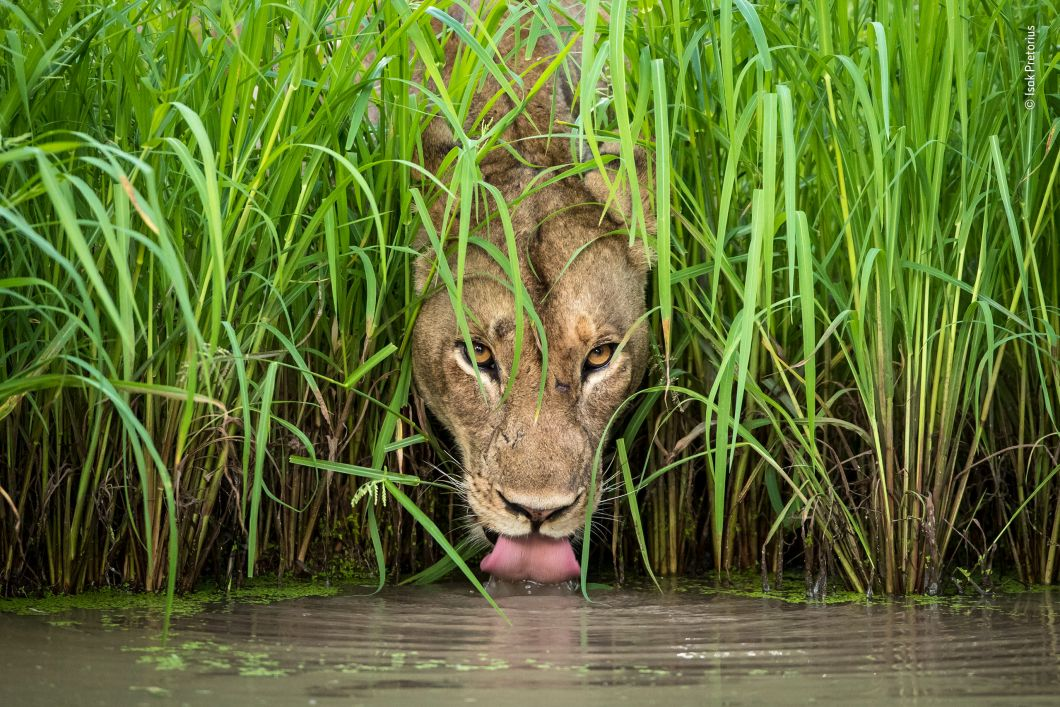

In [19]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open("./data/cool_cat.jpg"))

#### Visualise network features from the input image

In [20]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = "./data/cool_cat.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [24]:
# Extract the features

extracted_features = features(x)


 f1.shape: (1, 224, 224, 3)


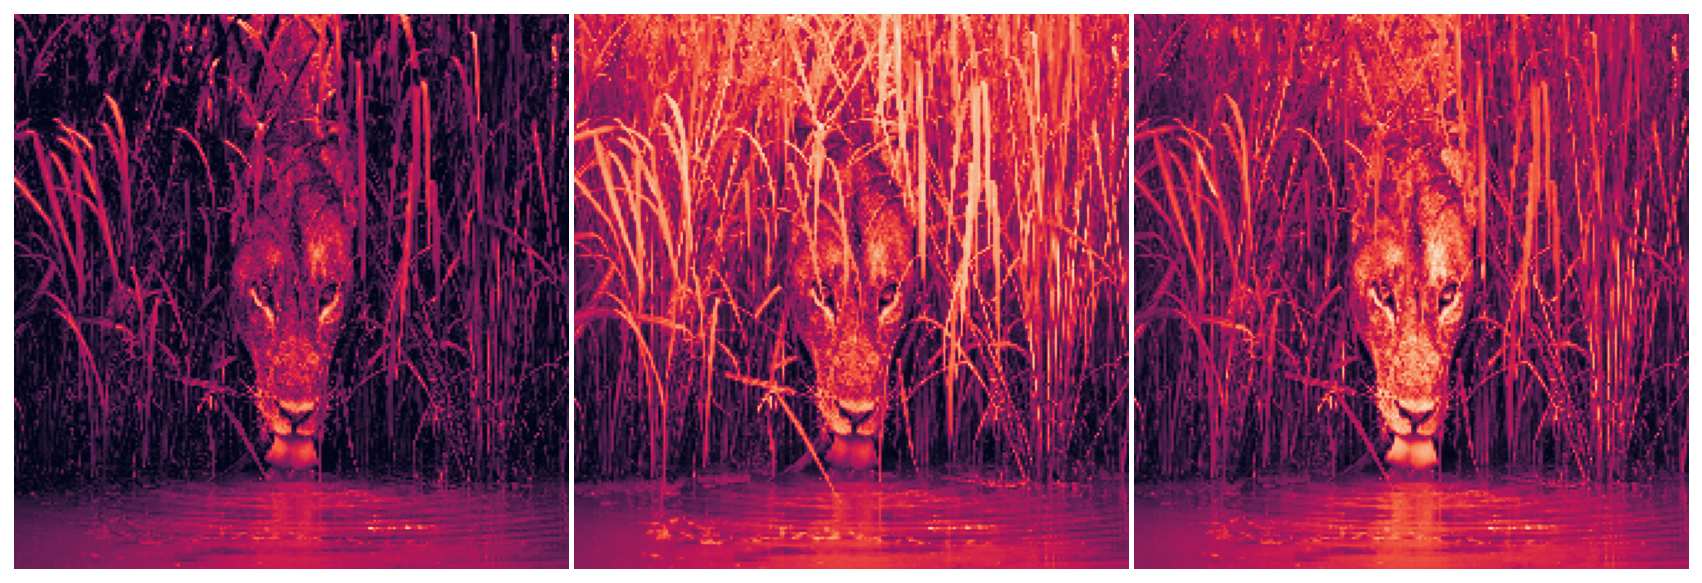

In [25]:
# Visualise the input channels

f1 = extracted_features[0]
print("\n f1.shape:", f1.shape)

imgs = f1[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(3):
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f2.shape: (1, 224, 224, 64)


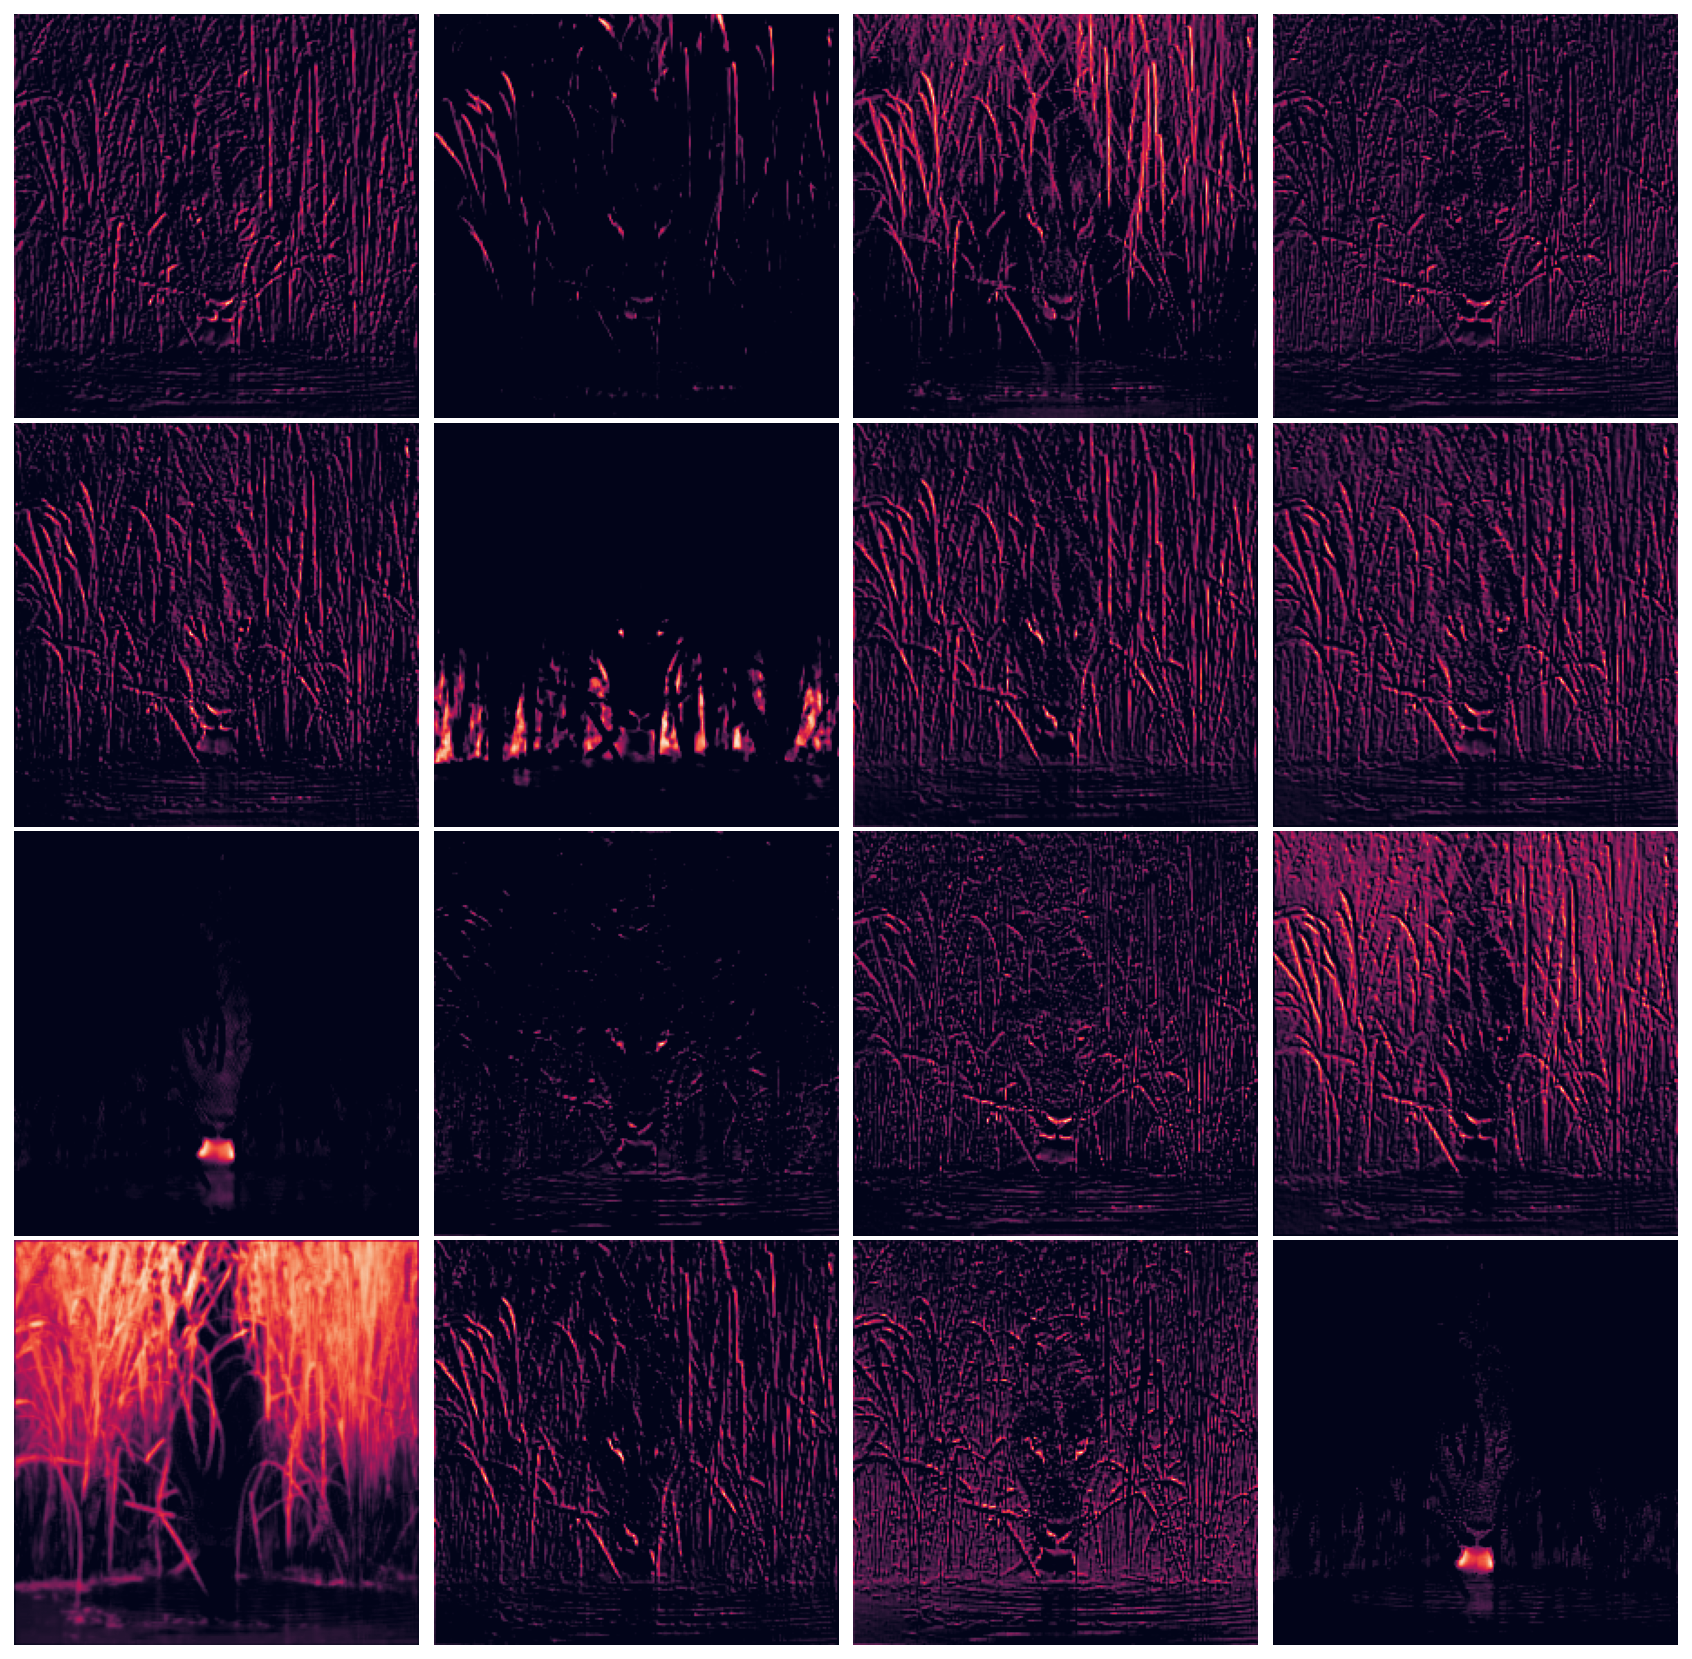

In [26]:
# Visualise some features in the first hidden layer

f2 = extracted_features[1]
print("\n f2.shape:", f2.shape)

imgs = f2[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [27]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(inputs=features.input,
    outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

1/1 [==============================] - 0s 106ms/step


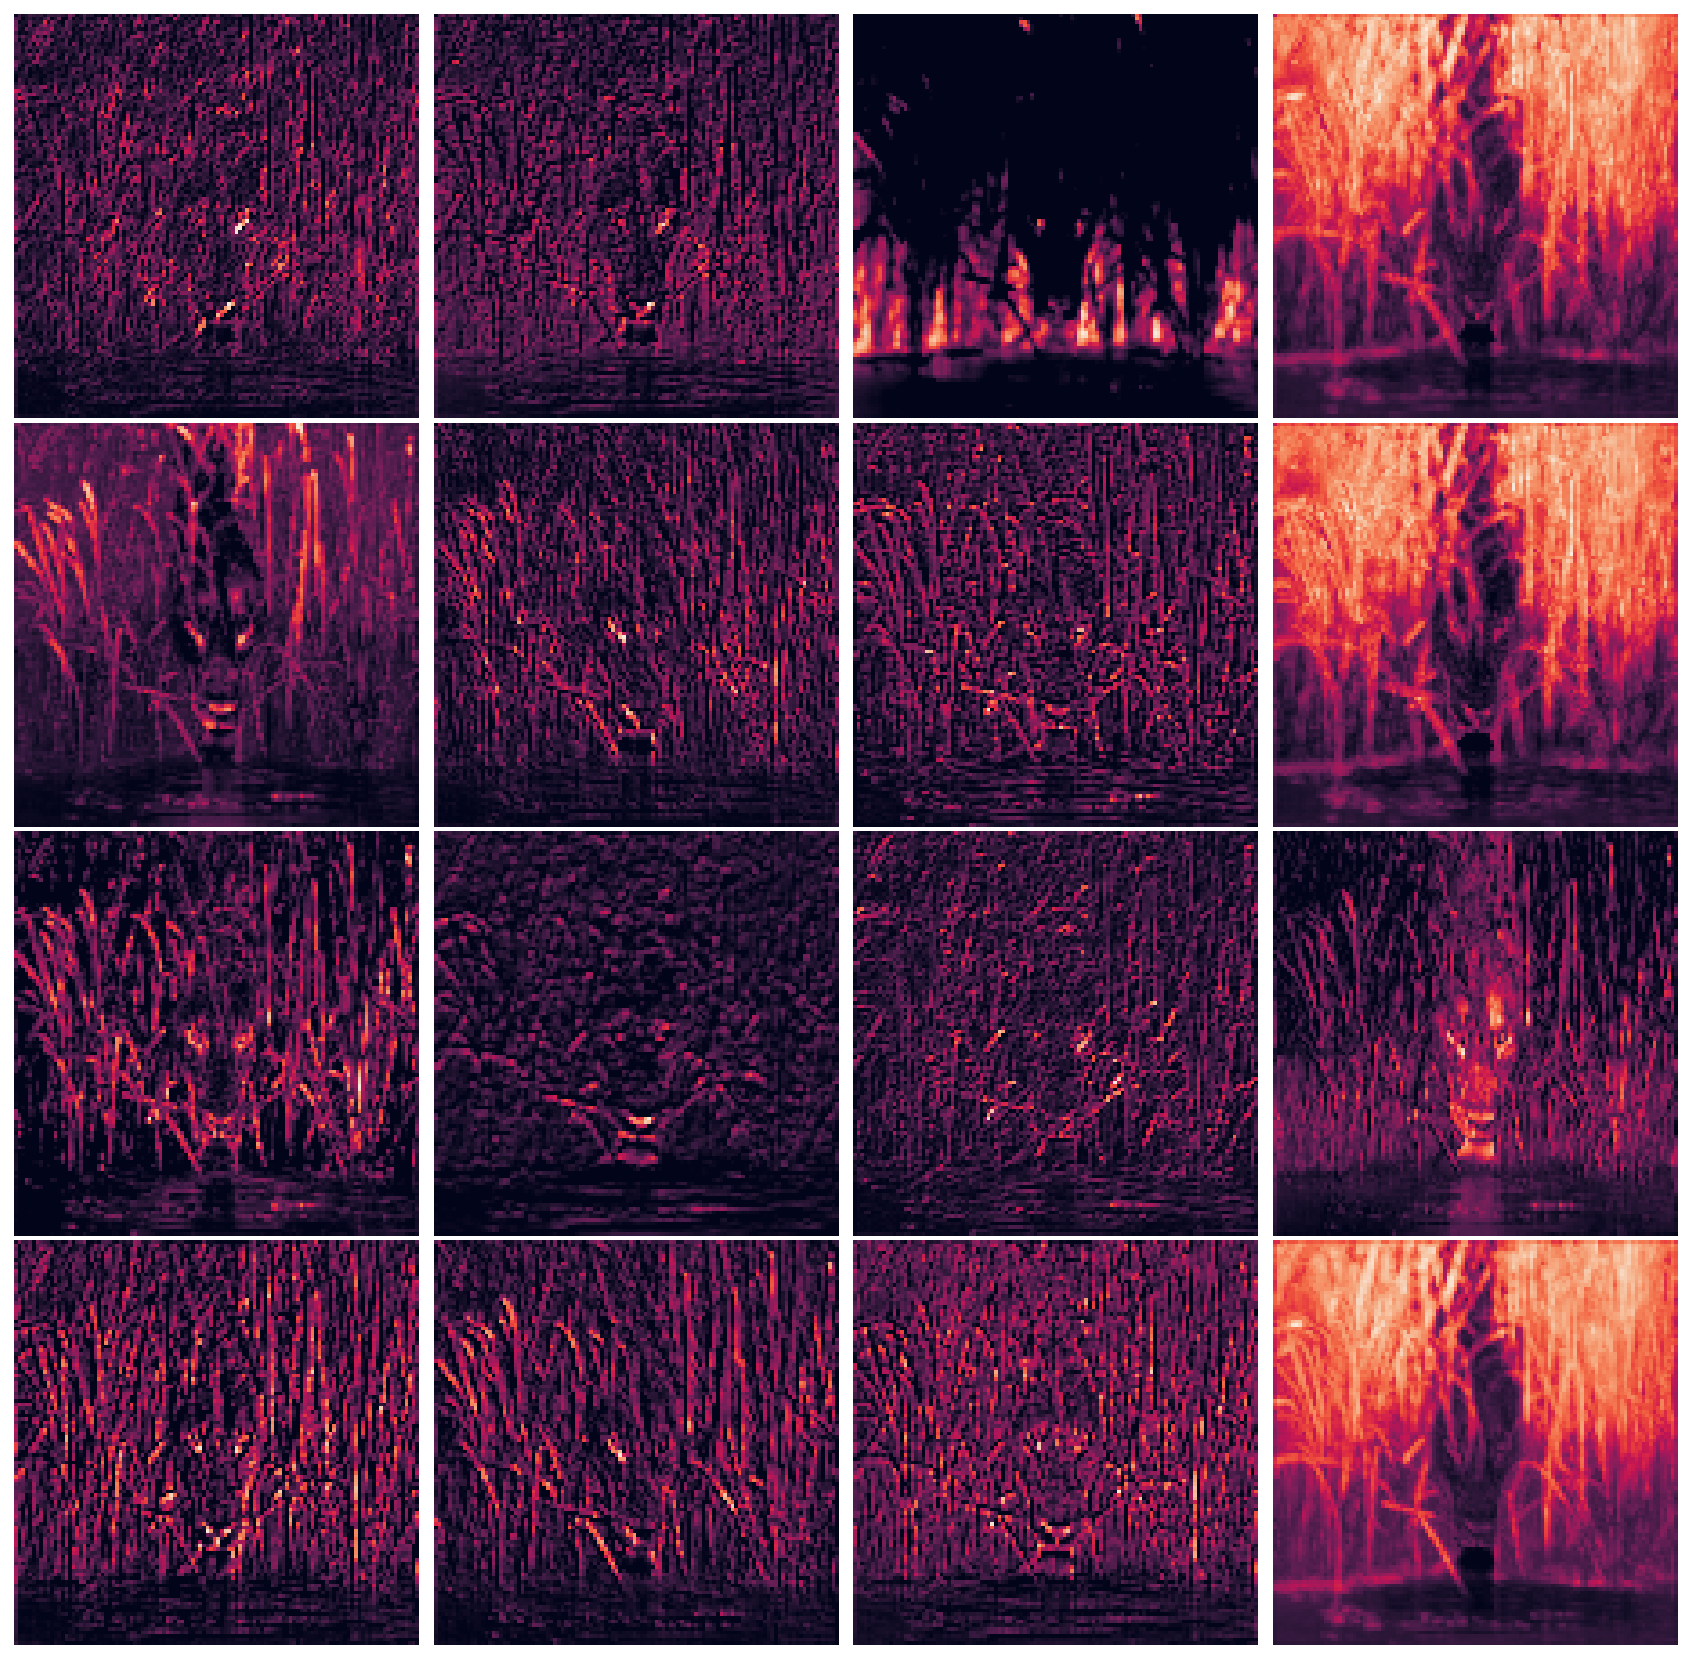

In [28]:
# Visualise some features from the extracted layer output

imgs = block1_pool_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [29]:
# Extract features from a layer deeper in the network

extracted_features_block5_conv4 = Model(inputs=features.input,
    outputs=features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

1/1 [==============================] - 0s 114ms/step


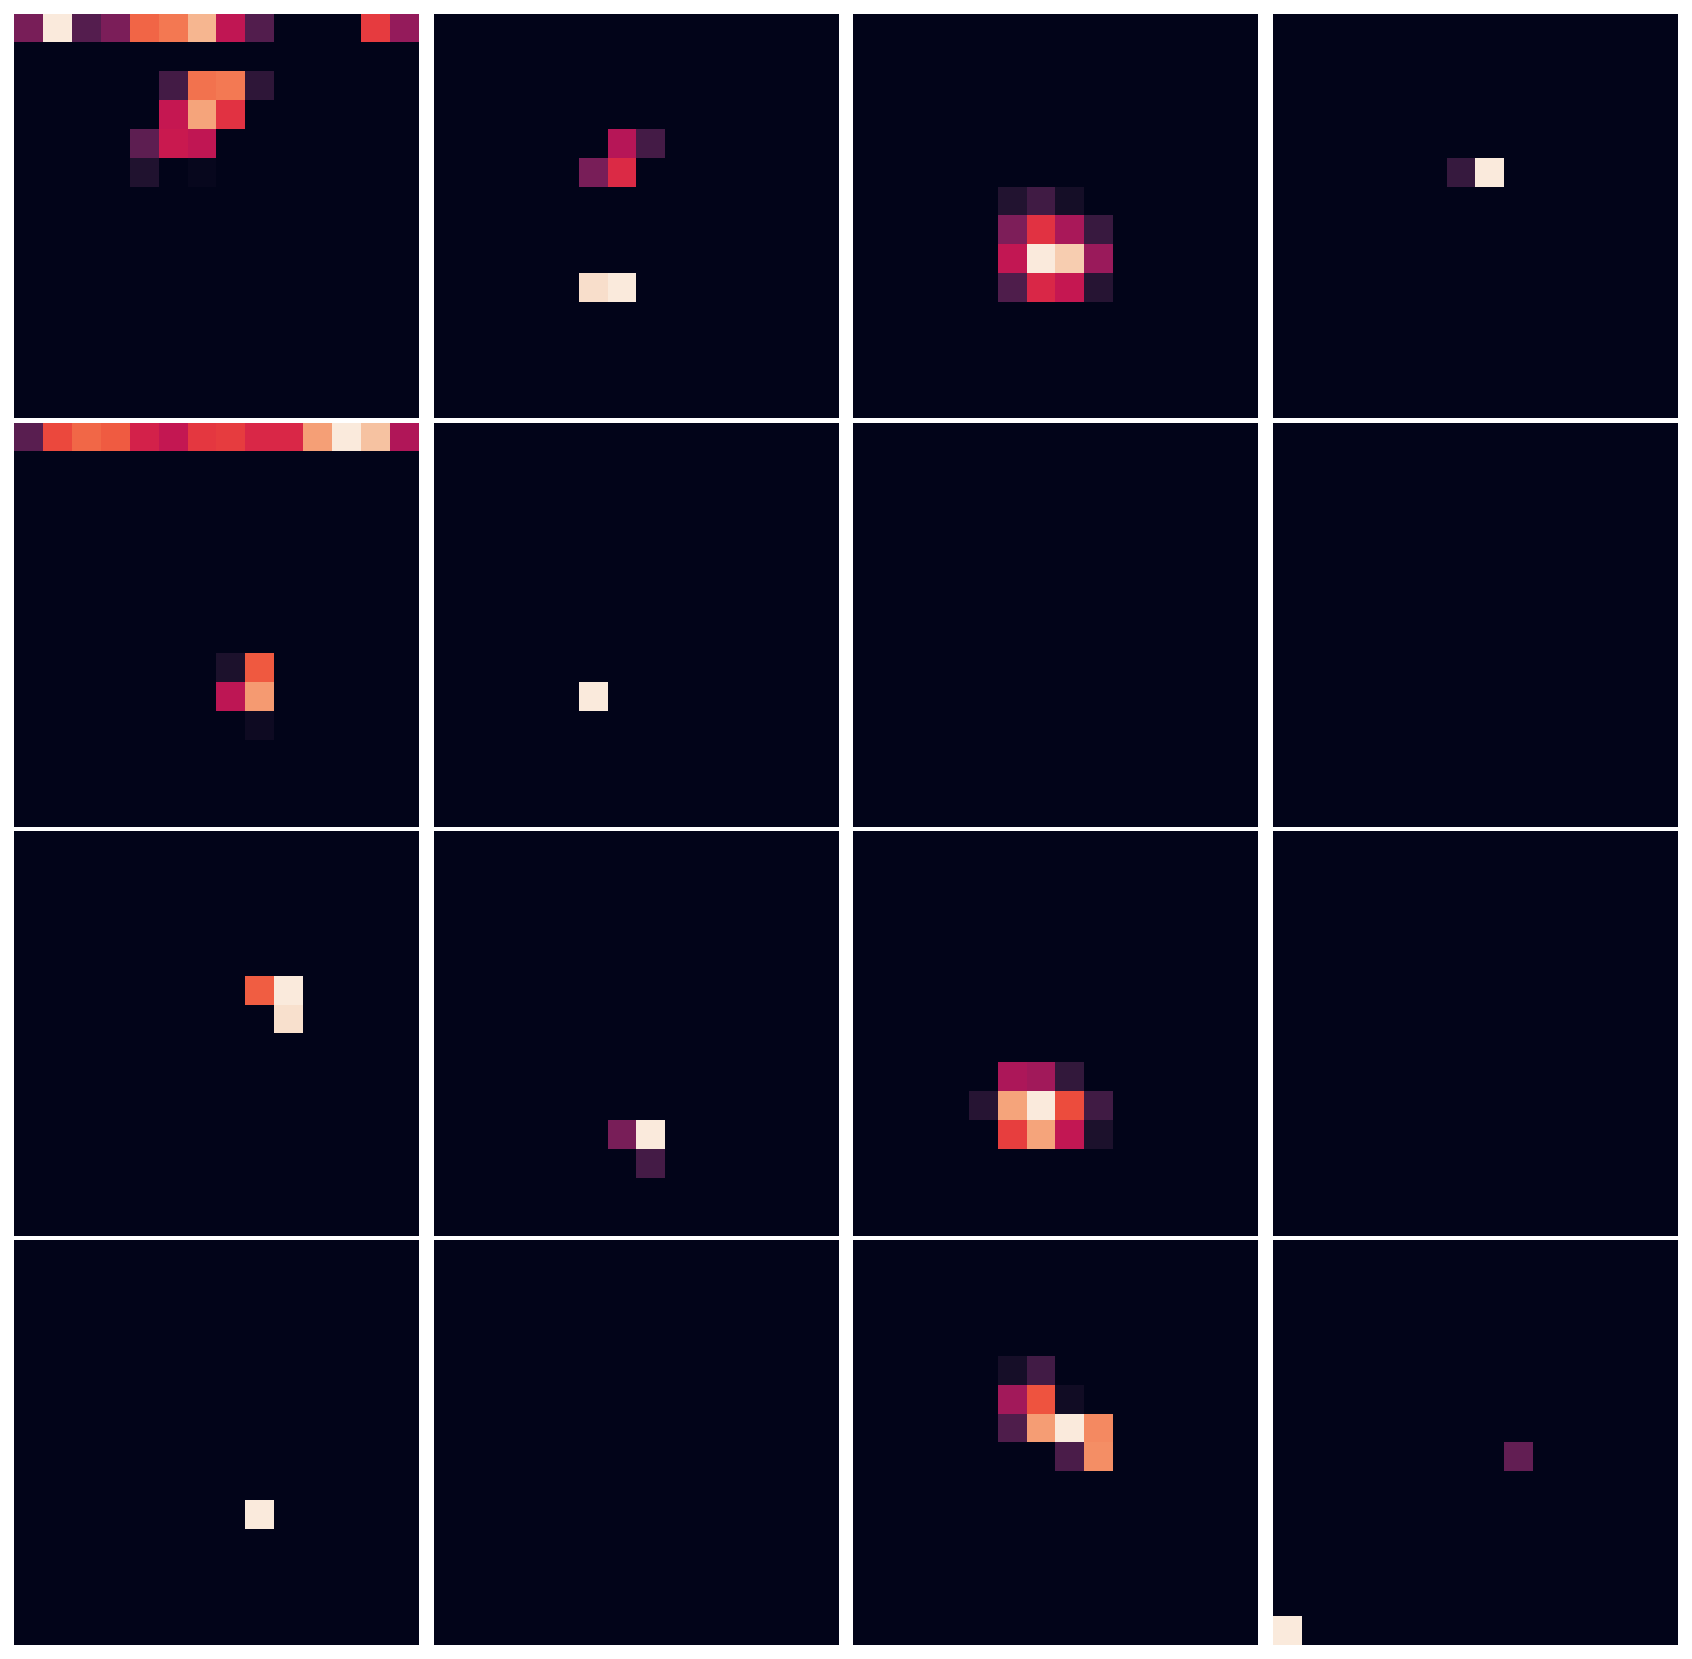

In [30]:
# Visualise some features from the extracted layer output

imgs = block5_conv4_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [ ]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', 
                 kernel_initializer='random_uniform',
                 bias_initializer='ones',
                 name="Dense_1"),
    layers.Dense(2, activation='relu', 
                 kernel_initializer='lecun_normal', 
                 bias_initializer='ones',
                 name="Dense_2"),
    layers.Dense(4, activation='softmax', name="Softmax"),
])

In [ ]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
Dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
Softmax (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [ ]:
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
    return [e.bias.numpy() for e in model.layers]

def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer ' + str(n) + ': bias variation: ', 
            np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1, 3, n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+ str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

In [ ]:
# Retrieve the weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [ ]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.14929135
Layer 1: bias variation:  0.0789965
Layer 2: bias variation:  0.1970488


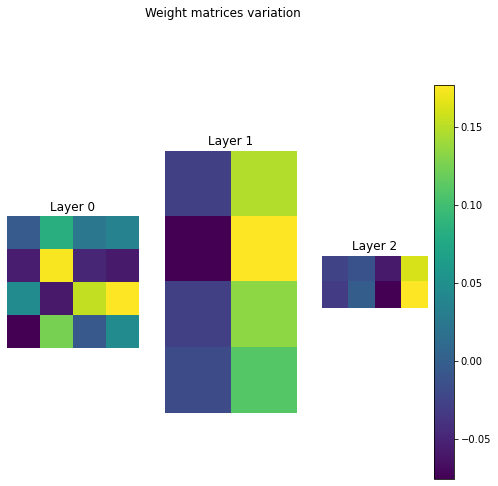

In [ ]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers at build time

In [ ]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables before 
# the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", 
      n_trainable_variables,
      "\n\t Number of non trainable variables: ", 
      n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [ ]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', 
                 kernel_initializer='random_uniform',
                 bias_initializer='ones',
                 trainable=False,
                 name="Dense_1"),
    layers.Dense(2, activation='relu', 
                 kernel_initializer='lecun_normal', 
                 bias_initializer='ones',
                 name="Dense_2"),
    layers.Dense(4, activation='softmax', name="Softmax"),
])

In [ ]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables after 
# the freezing

print("\n After freezing:\n\t Number of trainable variables: ", 
      n_trainable_variables,
      "\n\t Number of non trainable variables: ", 
      n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [ ]:
# Retrieve weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.12829101
Layer 2: bias variation:  0.24739614


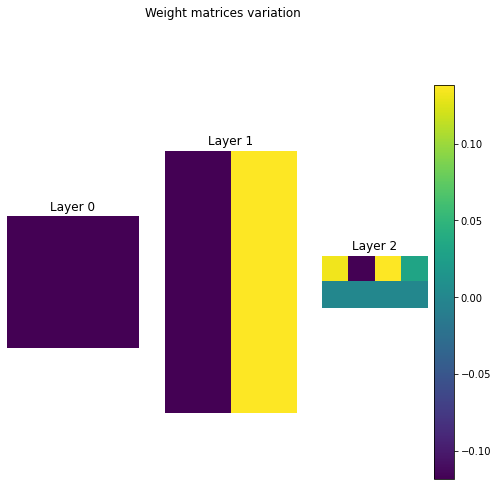

In [ ]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", 
      len(model.trainable_variables),
      "\n\t Number of non trainable variables: ", 
      len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [ ]:
# Freeze the second layer

model.get_layer("Dense_2").trainable = False

In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", 
      len(model.trainable_variables),
      "\n\t Number of non trainable variables: ", 
      len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W2_layers = get_weights(model)
b2_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.13380244


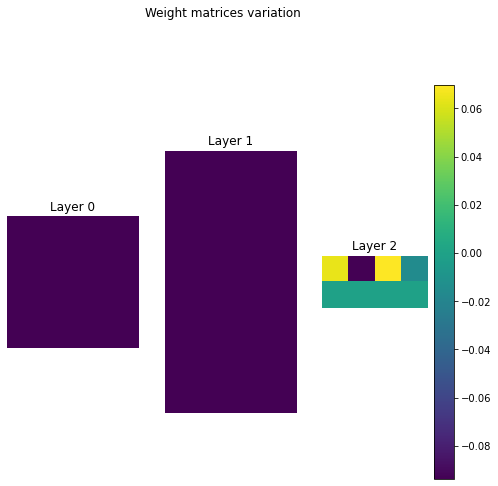

In [ ]:
# Plot the variation

plot_delta_weights(W1_layers, W2_layers, b1_layers, b2_layers)

from tensorflow.keras.models import load_model, Model

from tensorflow.keras.layers import Dense

model = load_model('my_pretrained_model')

model.trainable = False

flatten_output = model.get_layer('flatten_layer').output

new_outputs = Dense(5, activation='softmax', name='Softmax')(flatten_output)

new_model = Model(inputs=model.input, outputs=new_outputs)